<a href="https://colab.research.google.com/github/Arunapozhath/PYTORCH_TUTORIAL/blob/main/NEURAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***BASIC NEURAL NETWORK MODEL***



**PyTorch** is a powerful deep learning framework that allows you to create and train neural networks. It provides tensors (multi-dimensional arrays) which are essential for performing mathematical computations, similar to NumPy arrays but with GPU support for faster computations

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

**torch.nn** provides building blocks for creating neural networks, such as layers, loss functions, and optimizers

**Loss functions** measure the difference between the predicted output of the model and the actual target values

**Optimizers** adjust the weights of the neural network based on the gradients calculated by backpropagation. The goal is to minimize the loss function by updating the weights to improve predictions.

**Layers** are the building blocks of neural networks. PyTorch provides a variety of pre-built layers that help you define the architecture of your neural network.

 **torch.nn.functional** (imported as f) provides functions for activation, loss, and other operations without defining them as layers.


In [2]:
#a class model that inherites the module is created here
class Model(nn.Module):
    #we have an input layer that has 4 features of the flowers
    #hidden layer 1  h1 has some neurons and then hidden layer h2
    #output layer that tells us the class of flowers we generally have 3 classes
    def __init__ (self,in_features = 4 ,h1 = 8 ,h2 = 9 , out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    def forward(self ,x):
        x = f.relu(self.fc1(x))  # Apply ReLU after the first layer
        x = f.relu(self.fc2(x))  # Apply ReLU after the second layer
        x = self.out(x) # Final layer (no activation because it's for classification)

        return x

**f.relu** (Rectified Linear Unit) is an activation function applied after each layer. It introduces non-linearity to help the model learn complex patterns.

**Activation functions** ensure that the model does not act like a simple linear model, enabling it to handle more complicated tasks.

In [3]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()


**torch.manual_seed(41)**: This sets a seed for random number generation. In machine learning, randomness is used in many operations (like initializing weights). By setting a seed, we can ensure that our results are reproducible—each time we run the code, the results will be the same.

an instance of the **Model** class is created, representing our neural network

# ***LOAD DATA AND TRAIN NEURAL NETWORK MODEL***

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
url = sns.load_dataset('iris')
my_df = pd.DataFrame(url)
my_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#change last columns from strings to integers
my_df.species.replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0},inplace = True)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#train test split  set x , y
x = my_df.drop('species',axis = 1)
y = my_df['species']

**train_test_split** splits the data into training and testing sets (80% training, 20% testing here).

**x_train, x_test, y_train, y_test** store the features and labels for training and testing respectively.

In [9]:
#convert these to numpy arrays
x = x.values
y = y.values

In [10]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 41)

In [13]:
#converting x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


**FloatTensor** is used for input features.

**LongTensor** is used for target labels because it's a classification task.

In [14]:
#converting y features in to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
#set the criterion of model to measure the error , how far off the predictions are from the data
Criterion = nn.CrossEntropyLoss()

# choose adam optimizer , lr = learning rate (if error doenst go down after a bunch of interations (epochs, we lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01) #lower the lr ie learning rate more time the model needs to train


**CrossEntropyLoss** is commonly used for classification problems. It measures the difference between predicted probabilities and actual class labels.
The model tries to minimize this loss as training progresses.

**Adam** is an optimizer that adjusts the learning rate during training to improve performance.

**model.parameters**() retrieves the weights and biases of the model that need to be updated.

**Learning Rate (lr)** controls how big the steps are when updating weights. A smaller learning rate means slower training but often more accurate results.


In [16]:
model.parameters()

<generator object Module.parameters at 0x7869d1aa6b20>

In [17]:
#train our model
#epochs (one run through all the training data in our network)
epochs = 200
losses = []

for i in range(epochs):
    i+=1 #to get prediction

    y_pred = model.forward(x_train) #This is where the model makes predictions based on the training data.

    loss = Criterion(y_pred,y_train) #meaure the loss/error, gonna be high at first

    #here it shows predicted value vs the y_train
    #The difference between predictions and actual labels is calculated using the loss function.

    losses.append(loss.detach().numpy()) #keeping track of losses

    #print every 10 epoch
    if i % 10 == 0:
        print(f'epoch : {i} , loss : {loss}')#Every 10 epochs, the current epoch and loss are printed out.

    #doing back propogation now take error rate of forward propogation and
    #feed it back to the network to fine tune the weights

    optimizer.zero_grad() #Clears the gradients from the previous epoch to avoid accumulating them.

    loss.backward()# Backpropagation is done to calculate the gradient of the loss concerning the weights.

    optimizer.step()# Updates the model’s weights to reduce the loss in future iterations.



epoch : 10 , loss : 1.022811770439148
epoch : 20 , loss : 0.8412498831748962
epoch : 30 , loss : 0.6068398952484131
epoch : 40 , loss : 0.416587233543396
epoch : 50 , loss : 0.2791101336479187
epoch : 60 , loss : 0.18681582808494568
epoch : 70 , loss : 0.12634322047233582
epoch : 80 , loss : 0.08883019536733627
epoch : 90 , loss : 0.06684896349906921
epoch : 100 , loss : 0.053851909935474396
epoch : 110 , loss : 0.04572273790836334
epoch : 120 , loss : 0.04024447128176689
epoch : 130 , loss : 0.036299996078014374
epoch : 140 , loss : 0.03329409286379814
epoch : 150 , loss : 0.03074052929878235
epoch : 160 , loss : 0.028036367148160934
epoch : 170 , loss : 0.024922741577029228
epoch : 180 , loss : 0.021939504891633987
epoch : 190 , loss : 0.01950913481414318
epoch : 200 , loss : 0.017629781737923622


Text(0.5, 0, 'Epoch')

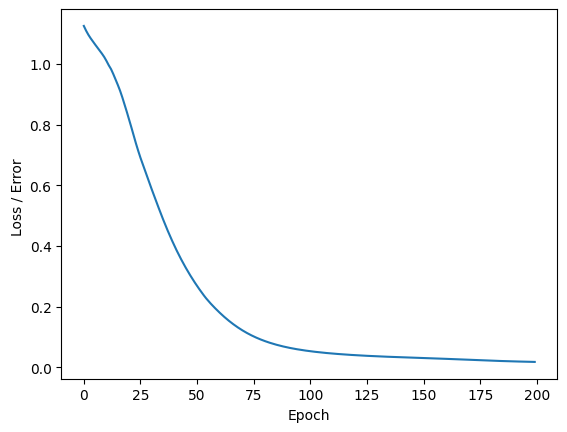

In [18]:
#graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss / Error ')
plt.xlabel('Epoch')

*The model uses ReLU activation and CrossEntropyLoss for classification, and it is optimized using the Adam optimizer. The training loop involves forward propagation, loss calculation, backpropagation, and weight updates.*

# ***VALIDATE OUR MODEL AND EVALUATE TEST DATA SET ON NETWORK***

In [19]:
#evaluate model on test data set (validate model on test set)
with torch.no_grad():#basically turn off back propogation
    y_eval = model.forward(x_test)#x test are features from our test set, y_eval will be predictions
    loss = Criterion(y_eval,y_test)#find the loss or error
    print(f'Loss : {loss}')


Loss : 0.17751437425613403


**torch.no_grad**(): Disables gradient tracking. During evaluation (testing), we don’t need to calculate gradients since we are not updating weights. This speeds up the computations and saves memory.

**model.forward(x_test):** The model takes the test data (x_test) as input and makes predictions (y_eval). The forward() method executes a forward pass through the network layers, producing predicted outputs for each sample in the test set.

**Criterion(y_eval, y_test):** The loss (error) is computed between the predicted values (y_eval) and the true labels (y_test). This helps to see how well the model is doing on unseen data (test set).

**print(f'Loss : {loss}')**: The loss value is printed out, indicating the model’s error on the test set. A lower loss means the model performed better.


In [20]:
correct = 0 #keep a track on the number of correct predictions
with torch.no_grad():
    for i,data in enumerate(x_test):
#Iterates over each test sample (data) from the x_test set, while also keeping an index (i) that counts the sample number.
        y_val = model.forward(data)
#For each test sample (data), the model makes a prediction (y_val). This is a forward pass for a single sample.

        #will tell us what typ of flower class our network thinks it is
        print(f'{i+1:2}. {str(y_val):38} \t {y_test[i]}')



 1. tensor([-7.0835,  3.9383,  8.7364])    	 2
 2. tensor([-9.8711,  1.7715, 15.9529])    	 2
 3. tensor([-10.8321,   3.0171,  16.0894]) 	 2
 4. tensor([-3.9556,  7.8952, -1.1898])    	 1
 5. tensor([-8.9617,  3.6069, 12.2657])    	 2
 6. tensor([-2.1212,  8.5256, -5.1761])    	 1
 7. tensor([-6.8941,  4.9858,  7.1656])    	 2
 8. tensor([-3.8531,  8.0700, -1.5697])    	 1
 9. tensor([-7.9051,  4.2999,  9.6752])    	 2
10. tensor([-10.5531,   1.8381,  17.0211]) 	 2
11. tensor([-6.5108,  5.1471,  6.3423])    	 2
12. tensor([ 11.4619,   1.4091, -20.3321]) 	 0
13. tensor([ 10.5282,   1.2512, -18.4660]) 	 0
14. tensor([-0.5117,  6.7447, -5.8110])    	 1
15. tensor([  9.2708,   2.4321, -17.7518]) 	 0
16. tensor([-6.0439,  5.7623,  4.8404])    	 2
17. tensor([ 10.3116,   1.5838, -18.5374]) 	 0
18. tensor([-6.8871,  4.3158,  7.9685])    	 1
19. tensor([ 12.2255,   1.0167, -21.1432]) 	 0
20. tensor([  8.8680,   1.9637, -16.4602]) 	 0
21. tensor([-1.1310,  7.4373, -5.5752])    	 1
22. tensor([-

In [21]:
#correct or not
if y_val.argmax().item() == y_test[i]:
    correct += 1

print (f"we got {correct} correct")

we got 1 correct


**Print Predictions**: Displays the following for each sample:

The sample index (i + 1).

The raw predicted values (y_val), padded to 38 characters for formatting. This syntax means that the string representation of y_val will be formatted to take up exactly 38 characters in width. If the string is shorter than 38 characters, it will be padded with spaces to ensure consistent alignment when printing multiple lines. This ensures that the output is neatly aligned when printed in a table-like format.

The actual species name (species).

The predicted class (y_val.argmax().item()), which is the class index with the highest probability.

 **Check Prediction is correct**

**Compare Predicted vs. Actual**: The argmax() method returns the index of the highest value in y_val, which corresponds to the predicted class.
If the predicted class is the same as the actual class (y_test[i]), the correct counter is incremented.



In [22]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
            species = 'setosa'
        elif y_test[i] == 1:
            species = 'versicolor'
        else:
            species = 'virginica'


        print(f'{i+1:2}. {str(y_val):38} \t {species}  \t {y_val.argmax().item()}')

        #correct or not
        if y_val.argmax().item() == y_test[i]:
           correct += 1

print (f"we got {correct} correct")





 #will tell us what typ of flower class our network thinks it is



 1. tensor([-7.0835,  3.9383,  8.7364])    	 virginica  	 2
 2. tensor([-9.8711,  1.7715, 15.9529])    	 virginica  	 2
 3. tensor([-10.8321,   3.0171,  16.0894]) 	 virginica  	 2
 4. tensor([-3.9556,  7.8952, -1.1898])    	 versicolor  	 1
 5. tensor([-8.9617,  3.6069, 12.2657])    	 virginica  	 2
 6. tensor([-2.1212,  8.5256, -5.1761])    	 versicolor  	 1
 7. tensor([-6.8941,  4.9858,  7.1656])    	 virginica  	 2
 8. tensor([-3.8531,  8.0700, -1.5697])    	 versicolor  	 1
 9. tensor([-7.9051,  4.2999,  9.6752])    	 virginica  	 2
10. tensor([-10.5531,   1.8381,  17.0211]) 	 virginica  	 2
11. tensor([-6.5108,  5.1471,  6.3423])    	 virginica  	 2
12. tensor([ 11.4619,   1.4091, -20.3321]) 	 setosa  	 0
13. tensor([ 10.5282,   1.2512, -18.4660]) 	 setosa  	 0
14. tensor([-0.5117,  6.7447, -5.8110])    	 versicolor  	 1
15. tensor([  9.2708,   2.4321, -17.7518]) 	 setosa  	 0
16. tensor([-6.0439,  5.7623,  4.8404])    	 virginica  	 1
17. tensor([ 10.3116,   1.5838, -18.5374]) 	 

*change the torch.manual_seed(41) to 32 and random_state = 32 and run all cells over again we could get the loss value close to the value of loss expected*

# ***EVALUATE NEW DATA AND MAKE PREDICTIONS***

In [23]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [24]:
with torch.no_grad():
    print(model.forward(new_iris))

tensor([ 11.2163,   1.2275, -19.6487])


**torch.no_grad**():

Purpose: Disables gradient computation.

Explanation: This line is a context manager in PyTorch that temporarily disables the computation of gradients. When you're performing inference or making predictions with a model (like in this case), you usually don't need gradients. Disabling them can speed up the process and save memory.

**print**(model.forward(new_iris))

Purpose: Forward pass and print.

Explanation:
**model.forward(new_iris)** calls the model's forward method to pass the new_iris data through the neural network, generating predictions.
.

In [26]:
newer_iris = torch.tensor(  [6.7,3.0,5.2,2.3])

In [27]:
with torch.no_grad():
    print(model.forward(newer_iris))

tensor([-8.9989,  3.5719, 12.3548])


# ***SAVE OUR NN MODEL***

In [28]:
torch.save(model.state_dict(),'model.pt')

In [29]:
#load
model.load_state_dict(torch.load('model.pt'))

<ipython-input-29-5681713ee816>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

In [30]:
#to make sure it loaded correctly
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)